## 교육 세션 5차 - 회귀 심화 예습

### 저번 시간에 배웠던 회귀 기초를 간단히 복습해보자.

```
1. 머신러닝
    머신러닝에는 지도 / 비지도 / 강화 학습이 있다.
        지도: 문제와 정답을 모두 가르쳐 줌
        비지도: 문제만 가르쳐 줌
        강화: 아무것도 안 가르쳐줌

2. 회귀와 분류
   1) 회귀: 연속형 범수 예측용 (독립변수들을 기반으로 종속변수(정답)을 맞히는(fit) 함수)
   2) 분류: 범주형 변수 예측용


3. 선형회귀
   - x에 따른 y를 예측한다
   1) 단순선형회귀
   2) 다중선형회귀
   3) 규제선형모델
      - 릿지 회귀
      - 라쏘 회귀
      - 엘라스틱넷

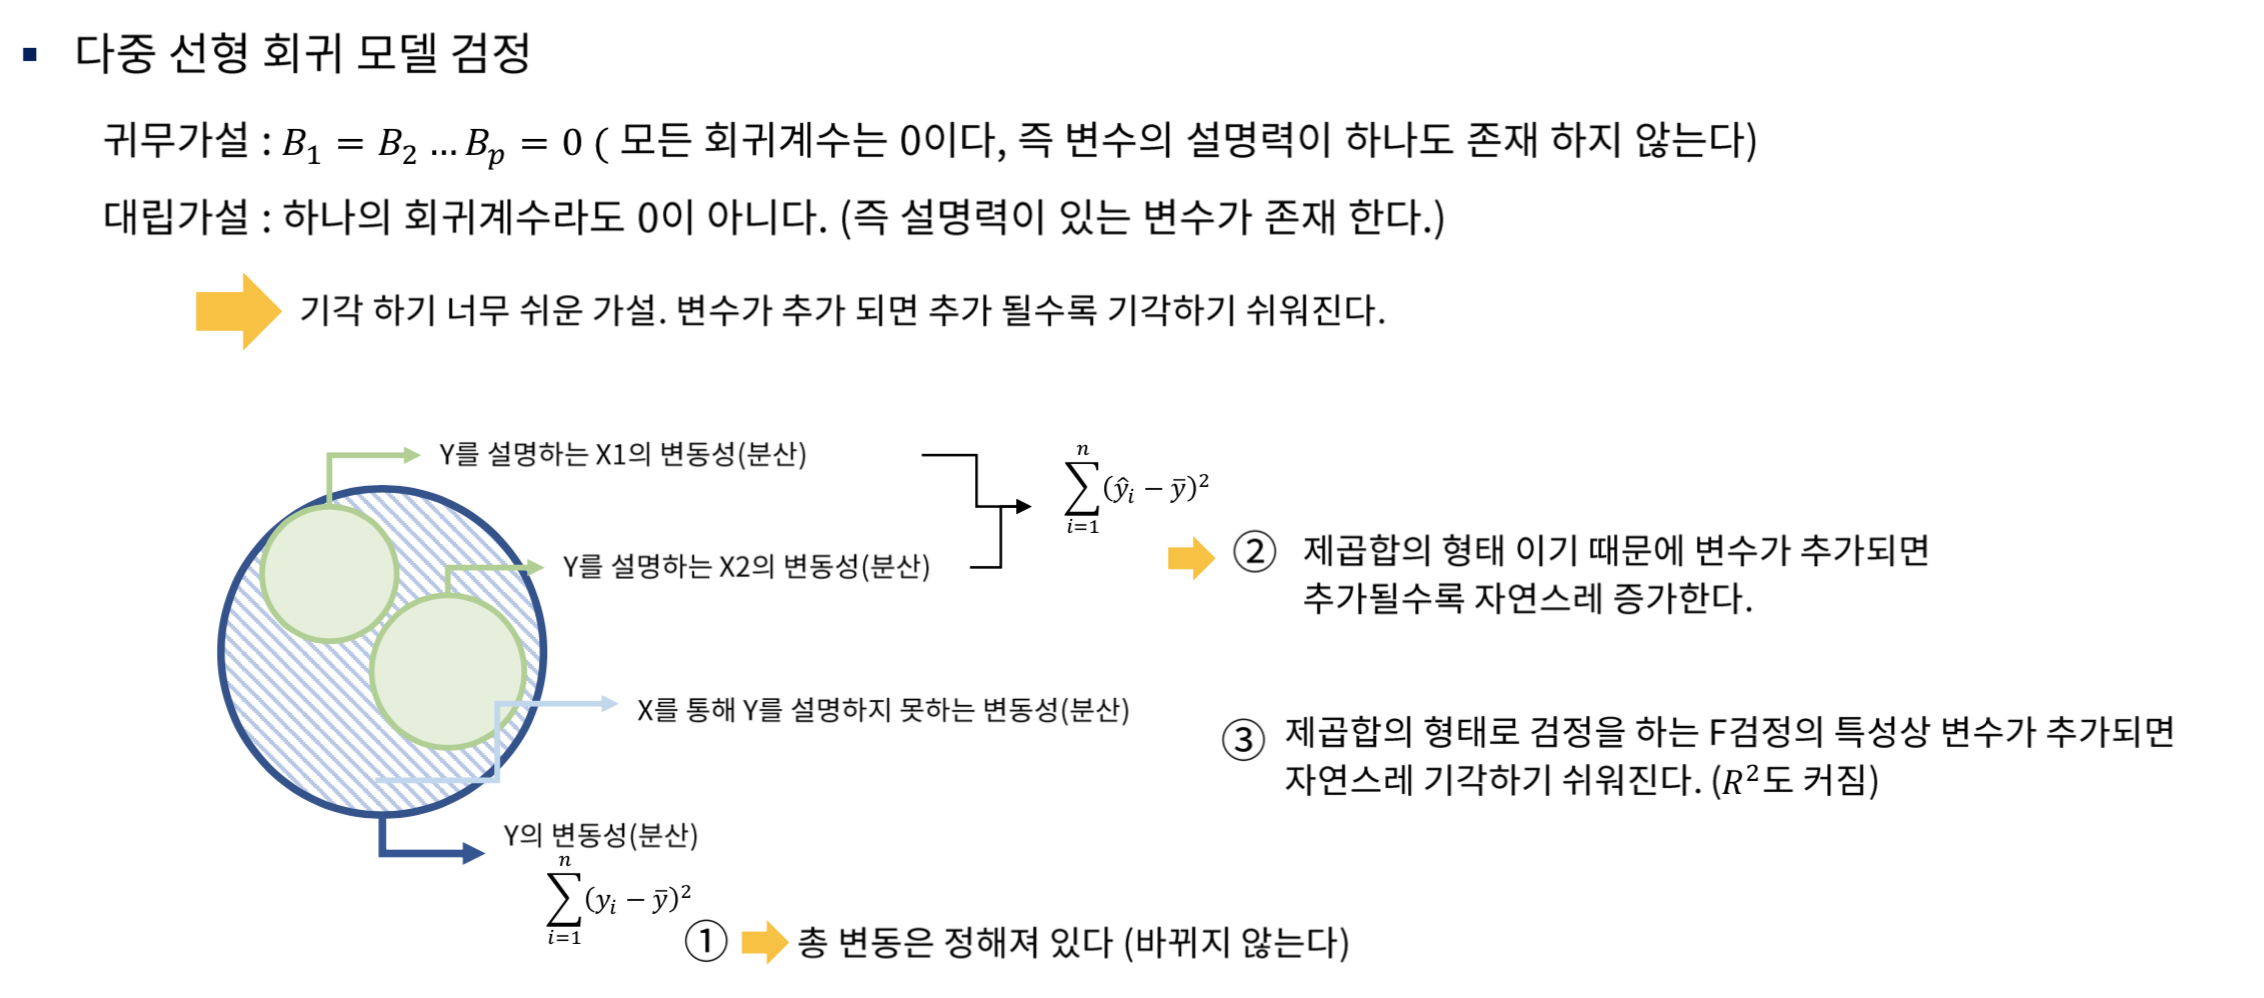

## <span style="background-color:#E0F7FA; color:#1565C0; padding:4px; border-radius:5px;"> 1. 다중선형회귀의 기본 가정 </span>

```
다중선형회귀란? 독립변수(x)가 2개 이상인 선형회귀

### 📢 요약

1. 선형성 : X와 y 간의 관계가 선형이어야 함.
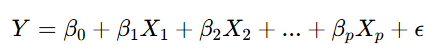
1. 독립성 : 독립적이지 않으면 다중공선성이 있다고 판단함 (이러면 변수 제거 등 귀찮은 가정이 동반됨...)
2. 오차항의 평균은 0 또는 0에 가가워야 한다.
3. 오차항의 분산이 일정해야 한다. 일정하지 않으면, 이분산성이 있다고 판단한다. 이렇게 되면 분석 결과가 정확하지 않아진다. (몇몇 구간에서만 정확하고, 나머지는 오차가 크게 발생해 버림)
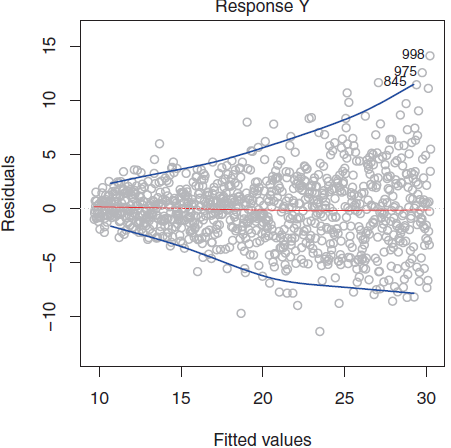
1. 오차항의 공분산은 항상 0이어야 한다.
2. 오차항이 정규분포를 따라야 한다. (but, 크리티컬한 영향을 주지는 않는다!)


### 선형성
- 독립 변수와 종속 변수 간에는 선형적인 관계가 존재해야 함. 즉, 독립 변수의 변화에 따라 종속 변수도 일정한 비율로 변화해야 한다.
- 확인방법: 산점도 행렬(선형성을 시각적으로 보여 줌), 잔차 그림(잔차가 무작위로 흩어져 있어야 함)

### 독립성
- 오차항들은 서로 독립이어야 함. 즉, 한 관측치의 오차가 다른 관측치의 오차에는 영향을 미쳐선 안 됨. 특히 시계열 데이터에서는 자기상관이 문제가 될 수 있음!
- 확인 방법: Durbin-Watson 통계량(값이 2에 가까울수록 자기상관이 없음을 의미), 잔차 그림(특정한 패턴이 있으면 자기상관이 존재할 가능성 有)

### 등분산성
- 오차항의 분산은 모든 독립 변수 값에 대해 동일해야 함. 즉, 예측값이 크든작든 오차의 흩어진 정도가 비슷해야!
- 확인 방법: Breusch-Pagan 검정, White 검정, 잔차 그림

### 정규성
- 오차항은 정규 분포를 따라야 함. 왜냐하면 회귀 계수에 대한 가설 검정, 신뢰 구간의 타당성을 보장해야 하기 때문임.
- 확인 방법: 히스토그램, Q-Q플롯(잔차의 분포를 시각적으로 확인), Shaprio-Wilk 검정, Kolmogorov-Smirnov 검정(정규성 여부를 통계적으로 검증)

### 독립 변수 간 다중공선성 x
- 독립 변수 간에는 상관관계가 거의 없어야 함.
- 확인 방법: 상관 행렬(독립 변수 간의 상관계수를 확인), 분산 팽창 지수(VIF)

### 오차항의 평균 = 0
- 오차항의 평균이 0이라는 건 모델이 체계적인 과대 또는 과소 예측을 하지 않는다는 뜻임
- 확인 방법: 모델 진단, 가설 검정

## <span style="background-color:#E0F7FA; color:#1565C0; padding:4px; border-radius:5px;"> 2. 회귀 분석의 평가 방법 </span>

### 결정 계수
- 총 변동 중에서 모델이 설명하는 변동의 비율 (=모델이 얼마나 데이터를 잘 설명하냐)
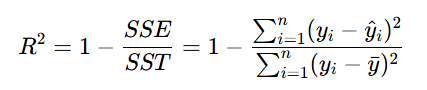
여기서 R^2는 0~1의 값을 가지고, 1에 가까울수록 모델이 데이터를 잘 설명하는 것

### 조정된 결정 계수
- 독립 변수의 개수를 고려하여 결정 계수를 보정한 값. 불필요한 독립 변수가 추가될 경우, R^2값이 감소하므로, 모델의 복잡도를 함께 고려하는 것이 가능!

### 평균 제곱 오차(MSE)
- 예측 값과 실제 값 차이 제곱의 평균
- 값이 작을수록 모델 성능이 좋음을 의미

### 평균 제곱근 오차 (RMSE)
- MSE와 거의 비슷하지만 원래 데이터와 단위가 동일하기에 해석이 용이함
- 값이 작을수록 모델 성능이 좋음을 의미

### 평균 절대 비율 오차 (MAPE)
- 예측값과 실제 값의 차이의 절대값을 실제값으로 나눈 값의 평균. (=오차의 비율)
- 값이 작을수록 모델의 성능이 좋음을 의미.
- but, 실제값이 0에 가까운 경우 무한대로 발산할 수 있으므로 주의해야 함.

```
시각적인 방법도 있지만, 통계지표를 활용하는 것이 객관적이다.
ex) R-square

## <span style="background-color:#E0F7FA; color:#2163C0; padding:4px; border-radius:5px;"> R-square </span>
- 이런 식으로 장표 상에 r-square가 나타난다.
- 이때, 1에 가까울수록 유의미!
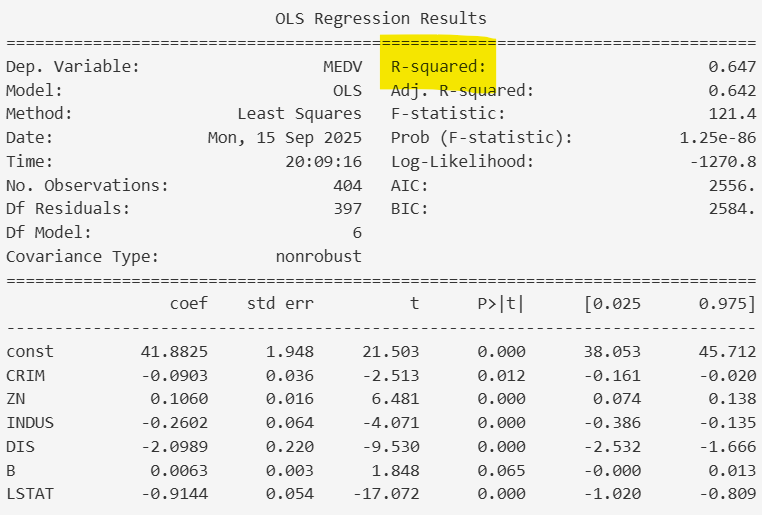

## <span style="background-color:#E0F7FA; color:#1565C0; padding:4px; border-radius:5px;"> 3. 비선형 회귀 모델 </span>

1. 다항식 회귀모델
2. 지수 회귀모델
3. 로그 회귀모델
4. 스플라인 회귀

### 1. 다항식 회귀모델
- x와 y 간의 관계가 다항식 형태로 표현될 수 있다고 가정하는 것
- d(다항식의 차수)를 조절하여 모델의 복잡도 조절이 가능함. 차수가 높을수록 모델이 복잡해지고, 적합하지만 과적합 위험이 있기에 적절한 차수 선택이 중요하다.

장점
1. 비교적 간단하게 비선형 관계 모델링이 가능
2. 해석이 쉽다

단점
1. 차수가 높아지면 과적합될 위험이 있다
2. 특히 특정 구간에만 과도하게 적합할 수 있다

```
ex) 시간에 따른 매출 변화, 화학 반응 속도

### 2. 지수 회귀모델
- 독립 변수의 변화에 따라 종속 변수가 지수적으로 증가하거나 감소하는 관계를 모델링

장점
- 로그 변환을 통해 선형 회귀 모델을 활용할 수 있다 (근데 이게 장점인가...?)
  

단점
1. 지수적인 패턴이 없는 데이터에서는 사용하는 의미가 x
2. 로그 변환 시 종속 변수가 0 또는 음수 값을 가질 수 없다

```
ex) 인구 증가, 감염병 확산

### 3. 로그 회귀모델
- 독립 변수의 로그 값에 대해 종속 변수가 선형적으로 변하는 관계 모델링
- 독립 변수가 0 또는 음수 값을 가질 수 없다
- x가 증가함에 따라 y가 감소하는 패턴을 보이는 데이터 모델링에 적합

장점
1. x가 증가함에 따라 y가 감소하는 패턴을 보이는 데이터 모델링에 적합
2. 로그 변환을 통해 선형 회귀 모델을 사용할 수 있다

단점
1. 독립 변수가 0 또는 음수 값을 가질 수 없다
2. 데이터가 로그 함수 형태가 아니면 사용하는 의미가 x

```
ex) 학습 시간과 시험 점수 간의 관계, 광고 노출 횟수에 따른 클릭률 변화

### 4. 스플라인 회귀
- 데이터를 여러 개의 구간으로 나누고, 각 구간별로 다항식 함수를 사용하여 곡선 형태로 데이터를 모델링
- Knot(매듭점) 존재 --> 얘가 구간을 나눔
- 매듭점의 위치와 개수, 각 구간별 다항식의 차수를 조절하여 모델의 복잡도를 조절함

장점
1. 다양한 형태의 비선형 관계를 모델링할 수 있음
2. 특정 구간에만 과도하게 적합되는 문제를 완화할 수 있음

단점
1. 매듭점의 위치와 개수, 각 구간별 다항식의 차수를 조절하는 게 어려움
2. 모델이 복잡해질 수 있고, 그에 따라 해석이 어려울 수 있음

```
ex) 성장 곡선, 기상 변화, 금융 시계열 데이터

## <span style="background-color:#E0F7FA; color:#1565C0; padding:4px; border-radius:5px;"> 4. 회귀 모델링 프로세스 </span>

#### 사전 검증 → 모델 생성 및 모델 학습(fit) → 모델 평가 → 모델 성능 개선

1. 사전 검증
   - 이때 EDA&전처리 (2주차) 개념을 활용한다! (결측치, 이상치 처리)
   - 회귀 분석의 기본 가정 6가지를 여기서 검토

2. 모델 생성 및 모델 학습(fit)
   - 여기서 모델의 유의성도 검정한다 (F/T검정)

3. 모델 평가
   - R-squared를 여기서 사용!

4. 모델 성능 개선
   - 필요 없는 변수를 제거하고, 비선형 모델을 사용한다